In [1]:
from CompilerQC import *
from CompilerQC import functions_for_database as database
import numpy as np
import random
from matplotlib import pyplot as plt
import networkx as nx

In [2]:
problem_folder = 'training_set'
for i, path in enumerate(database.get_files_to_problems(problem_folder, min_C=25, max_C=25)):
    if i > 2:
        break
    adj_matrix, qubit_to_coord_dict = database.problem_from_file(path)

In [3]:
%%time
graph_for_core = Graph(np.copy(adj_matrix))
qbits_for_core = Qbits.init_qbits_from_dict(graph_for_core, dict())
nodes_object_for_core = Nodes(qbits_for_core)
polygon_object_for_core = Polygons(nodes_object_for_core,
                                   polygons=Polygons.create_polygons(graph_for_core.get_cycles(4))
                                  )
energy_for_core = Energy_core(polygon_object_for_core, scaling_for_plaq4=1000)
mc_core = MC_core(energy_for_core)
mc_core.current_temperature = 10
mc_core.ancilla_deletion_probability = 0
mc_core.ancilla_insertion_probability = 0
mc_core.cluster_shuffling_probability = 0.2
mc_core.only_four_cycles_for_ancillas = False
mc_core.energy.only_squares_in_core = False
#mc_core.apply(1000)

CPU times: user 8.41 ms, sys: 387 µs, total: 8.8 ms
Wall time: 8.36 ms


<AxesSubplot:>

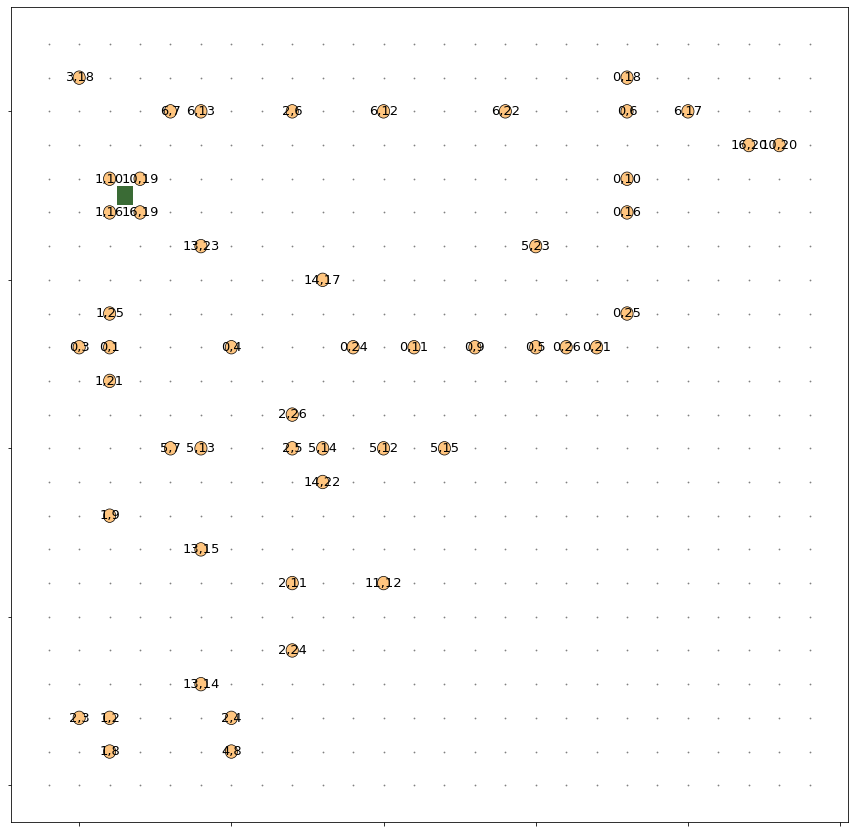

In [4]:
mc_core.energy.polygon_object.visualize()

In [ ]:
ancillas = {}
while len(ancillas) < 3:
    mc_core.apply(10)
    ancilla = mc_core.energy.polygon_object.nodes_object.propose_ancillas(1)
    if ancilla != {}:
        print(ancillas)

        ancillas.update(ancilla)
    mc_core.add_ancillas(ancilla, only_four_cycles=mc_core.only_four_cycles_for_ancillas)
ancillas

In [ ]:
%%time 
mc_core.reset(current_temperature=2, remove_ancillas=True)

In [ ]:
{qbit.qubit:None
for qbit in mc_core.energy.polygon_object.nodes_object.qbits
if qbit.ancilla==True
}

In [ ]:
%%time
mc_core.apply(100)

In [ ]:
graph = Graph(adj_matrix=np.copy(adj_matrix))
core_qbit_to_core_dict, core_corner, ancillas_in_core = mc_core.energy.qbits_in_max_core(graph.K)

qbits = Qbits.init_qbits_from_dict(graph, dict())
nodes_object = Nodes(qbits, place_qbits_in_lines=False)

polygon_object = Polygons(nodes_object)
polygon_object.core_corner = core_corner
energy = Energy(polygon_object, scaling_for_plaq3=1000, scaling_for_plaq4=1000)
mc = MC(energy)

mc.update_qbits_from_dict(core_qbit_to_core_dict, assign_to_core=True)

mc.add_ancillas(ancillas_in_core)

mc.current_temperature = 1
mc.n_total_steps = 0
mc.repetition_rate_factor = 10
mc.swap_probability=0.9

In [ ]:
mc.possible_coords_changed

In [ ]:
mc.energy.penalty_for_sparse_plaquette_density()

In [ ]:
coords_and_color = zip([qbit.coord for qbit in mc.energy.polygon_object.nodes_object.qbits.shell_qbits], mc.energy.penalty_for_sparse_plaquette_density())
_, ax = plt.subplots(figsize=(12,12))
#coords_to_color, colors = coords_and_color
m = max(mc.energy.penalty_for_sparse_plaquette_density())
for coord, color in coords_and_color:
    
    ax.scatter(*coord, color=str(color), s=3000)
mc.energy.polygon_object.visualize(ax=ax)

In [ ]:
# mc_core.remove_ancillas(mc_core.energy.polygon_object.nodes_object.propose_ancillas_to_remove())

In [ ]:
# mc.length_of_node_weight = True
# mc.shell_search = True
# mc.same_node_coords = True
mc.random_qbit=True
# mc.envelop_shell_search = True
mc.shell_search = True

In [ ]:
mc.coord_around_core()

In [ ]:
mc.energy.polygon_object.visualize()
plt.show()
for i in range(1000):
    (mc.apply(1))
    if (mc.possible_coords_changed):
        _, ax = plt.subplots(figsize=(15,15))
        coords_around_core = mc.possible_coords
        x, y = list(zip(*coords_around_core))
        ax.scatter(x, y, color="red", s=3000)
        mc.energy.polygon_object.visualize(ax=ax)
        plt.show()
    else:
        print('no change')

In [ ]:
_, ax = plt.subplots(figsize=(15,15))
# coords_around_core = mc.possible_coords
# x, y = list(zip(*list(set(coords_around_core) - set(qbits.core_qbit_coords))))
# ax.scatter(x, y, color="red", s=3000)
mc.energy.polygon_object.visualize(ax=ax)
plt.show()

In [ ]:
mc.number_of_plaquettes == len(mc.energy.polygon_object.nodes_object.qbits.found_plaqs())

In [ ]:
mc.coord_from_same_node(qbits[(2,12)])

In [ ]:
mc.energy.polygon_object.nodes_object.qbits.random_weighted_shell_qbit?

In [ ]:
qbit = qbits[(1,2)]

In [ ]:
fom 

In [ ]:
a,b,_,_,_ = mc.select_lines_in_core()

In [ ]:
len(a+b), len(set(a+b))

In [ ]:
[aa.qubit for aa in b]

core search:

graph, ignore short lines

qbits

nodes

polygons, only squares

energy, scaling, function

mc, ancilla probability, cluster swaps, line swaps


return core qbit dict, ancillas

remaining search:

graph, add ancillas

qbits, core qbit dict

polygons

energy, scaling, lines, funcitons

mc search in shells around core, moves/swaps, cluster swaps, line swaps inside cluster


---

benchmark code (testen, mc.reset - ancillas!) + configs 

server:neutron einrichten
